In [1]:
import touch



In [2]:
from torchvision import models

In [3]:
dir(models) #해당 객체의 모든 속성과 메서드를 나열해줍니다

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [4]:
alexnet=models.AlexNet()

In [5]:
resnet=models.resnet101(pretrained=True)

/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
from torchvision import transforms
preprocess = transforms.Compose([ # 전처리 단계를 순차적으로 적용하는 기능
    transforms.Resize(256), #사이즈 조절하고
    transforms.CenterCrop(224), #224중심으로 자름
    transforms.ToTensor(), #텐서화
    transforms.Normalize( #정규화 
    mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225]
  )])

In [8]:
import os
print(os.getcwd())


/Users/b32/Desktop/github/2384star/pytouch


In [58]:
from PIL import Image#Image 모듈은 이미지 파일을 여는 데 사용되는 주요 함수와 메서드를 포함
img_dog=Image.open("./dataset/pytorch/data/p1ch2/bobby.jpg") #객체형태로저장

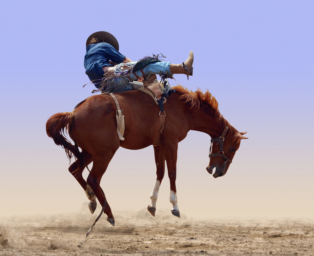

In [53]:
img_dog
#위를 전처리해보자 
img_t = preprocess(img)

from torchvision.transforms.functional import to_pil_image #텐서를 이미지로 변환하는 라이브러리함수

# 텐서를 PIL 이미지로 변환
img_pil = to_pil_image(img_t)

# 이미지 출력
img_pil


In [11]:
import torch
batch_t=torch.unsqueeze(img_t,0) #스퀴즈와 반대경우 dim=기준으로 차원을 1의차원을 추가한다 

In [12]:
batch_t.shape #추가된거 확인 

torch.Size([1, 3, 224, 224])

## 추론(inference)
- 딥러닝 사이클에서 훈련된 모델에 새로운 데이터를 넣어 결과롤 보는 과정

In [13]:
resnet.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
out=resnet(batch_t) #레즈넷에 삽입 후 출력
out



tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5183e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

In [15]:
#참고한 이미지넷의 분류 파일을 리딩
with open("./dataset/pytorch/data/p1ch2/imagenet_classes.txt") as f:
    labels=[line.strip() for line in f.readlines()] # 공백기준으로 모든라인 문장들 읽어오기
    
print(labels) 
len(labels) #총1000개의 클래스등장 
print(labels[1])

['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel, dipper', 'kite', 'bald eagle, American eagle, Haliaeetus leucocephalus', 'vulture', 'great grey owl, great gray owl, Strix nebulosa', 'European fire salamander, Salamandra salamandra', 'common newt, Triturus vulgaris', 'eft', 'spotted salamander, Ambystoma maculatum', 'axolotl, mud puppy, Ambystoma mexicanum', 'bullfrog, Rana catesbeiana', 'tree frog, tree-frog', 'tailed frog, bell toad, 

In [16]:

_,index=torch.max(out,1) # 주어진 차원에 대해 최대값과 그 값의 인덱스를 반환
#라벨에서 대상 클래스확인 

print(f"Predicted class:, ,label: {_}\n index: {index}\n class :{labels[index.item()]}")


Predicted class:, ,label: tensor([15.6744], grad_fn=<MaxBackward0>)
 index: tensor([207])
 class :golden retriever


In [17]:
percentage = torch.nn.functional.softmax(out,dim=1)[0]*100 #dim 차원을 따라 연산 #1000개의 값을 전부 불러옴 
# 100분율을위해 *1000 [0]인덱스
labels[index[0]],percentage[index[0]].item()

('golden retriever', 96.29334259033203)

In [18]:
percentage

tensor([4.6218e-07, 2.8483e-06, 1.2931e-06, 5.7253e-07, 5.8387e-07, 3.8473e-06,
        1.9386e-06, 1.2182e-06, 4.0723e-06, 8.3405e-07, 2.7796e-06, 4.0673e-06,
        1.1003e-06, 7.7414e-07, 1.3212e-06, 8.9958e-07, 5.5247e-07, 6.7833e-06,
        7.8199e-06, 4.3828e-06, 7.3283e-07, 2.9020e-07, 1.5543e-06, 5.0904e-06,
        5.3939e-06, 5.2818e-06, 6.8163e-07, 1.2805e-06, 1.6688e-06, 5.9041e-07,
        5.5276e-07, 2.3471e-06, 1.8523e-06, 1.7785e-06, 2.2217e-06, 5.8755e-07,
        4.8013e-06, 5.0330e-06, 4.4368e-06, 5.9013e-06, 9.5598e-06, 3.1885e-06,
        6.1842e-05, 1.6730e-05, 2.3734e-06, 3.4142e-06, 3.9282e-05, 5.5508e-06,
        7.4264e-07, 9.7054e-07, 1.1374e-06, 1.9001e-06, 2.4753e-06, 2.1720e-06,
        2.5495e-06, 4.0732e-06, 9.4879e-06, 1.9248e-06, 5.6447e-07, 9.0611e-06,
        1.0245e-05, 4.9223e-06, 7.1601e-06, 3.5915e-06, 3.3878e-06, 1.8243e-06,
        2.6410e-06, 1.0018e-05, 2.1622e-06, 3.3950e-06, 4.4742e-06, 3.9998e-06,
        5.0798e-06, 1.6244e-05, 9.9251e-

In [19]:
#정렬해서 출력해보자
_,indics = torch.sort(out,descending=True)# 정렬해서 가장높은 5개 추론
[(labels[idx],percentage[idx].item()) for idx in indics[0][:5]]

[('golden retriever', 96.29334259033203),
 ('Labrador retriever', 2.80812406539917),
 ('cocker spaniel, English cocker spaniel, cocker', 0.282673180103302),
 ('redbone', 0.2086319923400879),
 ('tennis ball', 0.1162160336971283)]

## 좋아 다른이미지 실험해보자 
- 얼룩말 
- 캐릭터
- 텀블러
- 사자
- 고양이

In [20]:
#from PIL import Image#Image 모듈은 이미지 파일을 여는 데 사용되는 주요 함수와 메서드를 포함
#img=Image.open("./dataset/pytorch/data/p1ch2/bobby.jpg") #객체형태로저장
from PIL import Image
img1 = Image.open("./dataset/t_1.jpeg")
img2 = Image.open("./dataset/t_2.jpeg")
img3 = Image.open("./dataset/t_3.jpeg")
img4 = Image.open("./dataset/t_4.jpeg")
img5 = Image.open("./dataset/t_5.jpg")

In [21]:
from torchvision import transforms
preprocess2 =transforms.Compose([   #순차적용
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]
    
    
    )])


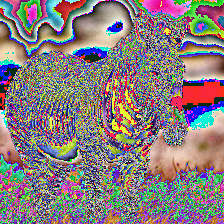

In [22]:
from torchvision.transforms.functional import to_pil_image  #텐서 -> 이미지변형
img_sample1=preprocess(img1)
img_sample2=preprocess(img2)
img_sample3=preprocess(img3)
img_sample4=preprocess(img4)
img_sample5=preprocess(img5)
# 텐서를 PIL 이미지로 변환
img_pil1 = to_pil_image(img_sample5)
img_pil1

### 위코드를 개선해보자

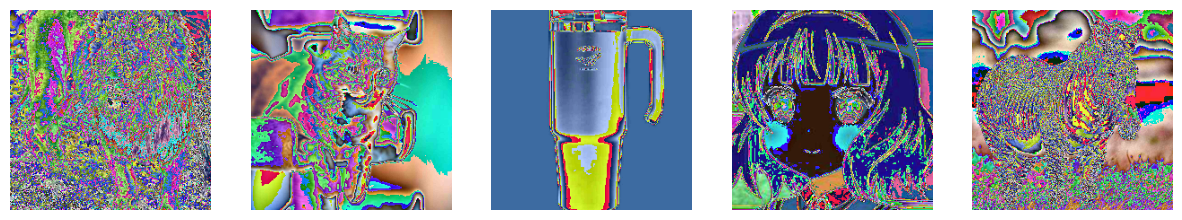

In [23]:
import matplotlib.pyplot as plt
imges=[img1, img2, img3, img4,  img5]

preprocess_images=[preprocess2(img)for img in imges]
fig,axes=plt.subplots(1,5,figsize=(15,5))

for i, img_tensor in enumerate(preprocess_images):
    img_pil2=to_pil_image(img_tensor)
    axes[i].imshow(img_pil2)
    axes[i].axis("off")

In [24]:
img_sample1
batch_1=torch.unsqueeze(img_sample5,dim=0)

In [25]:
resnet.eval()
out2=resnet(batch_1) #레즈넷에 삽입 후 출력
out2


tensor([[-8.3450e-01, -9.8546e-01, -2.6093e+00, -8.8093e-01, -2.4438e+00,
         -2.2764e+00, -5.2689e-01,  1.3755e+00,  2.2821e+00,  5.3523e+00,
          4.5137e-01,  3.0475e+00, -1.1842e-01, -2.6224e-01, -1.6112e+00,
         -8.4251e-01, -8.0646e-01, -2.9107e-01, -2.8214e-01,  9.4982e-01,
         -2.5932e+00,  1.2247e+00, -1.5751e+00,  3.7960e+00,  1.1469e+00,
         -6.5081e-01, -1.1087e+00, -1.9371e+00, -2.8127e-02, -1.3003e+00,
         -1.9805e+00, -1.2295e+00, -8.9384e-01, -8.1981e-01,  1.5092e+00,
          3.6905e-01,  3.6041e+00,  6.3753e-01,  3.7932e+00,  6.3658e-01,
         -1.1061e+00,  4.9433e+00,  1.6769e-01, -7.3708e-01,  1.0889e+00,
          7.6919e-01,  1.7361e-01,  3.3248e-01, -2.3359e-01, -6.3777e-01,
         -8.9300e-01,  1.1797e+00,  6.6975e-01,  1.1047e-01, -3.1144e-01,
         -2.2798e+00,  1.9537e+00,  1.4522e+00,  2.7437e-01,  5.7698e-01,
          1.9383e+00, -8.2047e-01,  1.4822e+00,  2.7443e+00, -1.5508e+00,
          4.9483e-01,  1.6821e+00,  1.

In [26]:
percentage= torch.nn.functional.softmax(out2,dim=1)[0] *100

_,idx =torch.sort(out2, descending=True)
[(labels[idx],percentage[idx].item()) for idx in idx[0][:5]]

[('zebra', 99.87257385253906),
 ('gazelle', 0.051963068544864655),
 ('impala, Aepyceros melampus', 0.02255065180361271),
 ('prairie chicken, prairie grouse, prairie fowl', 0.011855500750243664),
 ('hartebeest', 0.0073090484365820885)]

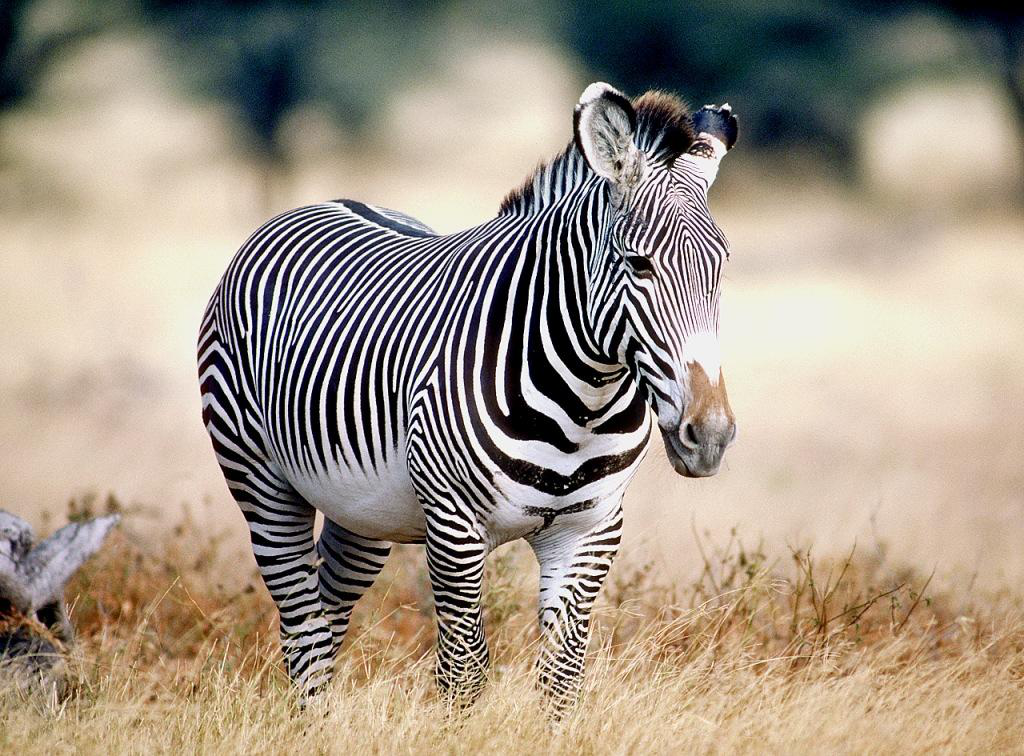

In [27]:
img5

## Cycle GAN

In [28]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [30]:
netG=ResNetGenerator()

In [34]:
model_path="./dataset/pytorch/data/p1ch2/horse2zebra_0.4.0.pth"
model_data=torch.load(model_path) 
netG.load_state_dict(model_data) #모델의 가중치를 로드하는데 사용

for key, value in model_data.items():
    print(f"{key}: {value.shape}")


model.1.weight: torch.Size([64, 3, 7, 7])
model.1.bias: torch.Size([64])
model.4.weight: torch.Size([128, 64, 3, 3])
model.4.bias: torch.Size([128])
model.7.weight: torch.Size([256, 128, 3, 3])
model.7.bias: torch.Size([256])
model.10.conv_block.1.weight: torch.Size([256, 256, 3, 3])
model.10.conv_block.1.bias: torch.Size([256])
model.10.conv_block.5.weight: torch.Size([256, 256, 3, 3])
model.10.conv_block.5.bias: torch.Size([256])
model.11.conv_block.1.weight: torch.Size([256, 256, 3, 3])
model.11.conv_block.1.bias: torch.Size([256])
model.11.conv_block.5.weight: torch.Size([256, 256, 3, 3])
model.11.conv_block.5.bias: torch.Size([256])
model.12.conv_block.1.weight: torch.Size([256, 256, 3, 3])
model.12.conv_block.1.bias: torch.Size([256])
model.12.conv_block.5.weight: torch.Size([256, 256, 3, 3])
model.12.conv_block.5.bias: torch.Size([256])
model.13.conv_block.1.weight: torch.Size([256, 256, 3, 3])
model.13.conv_block.1.bias: torch.Size([256])
model.13.conv_block.5.weight: torch.Siz

In [35]:
netG.eval()


ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [36]:
from PIL import Image
from torchvision import transforms

preprocess= transforms.Compose([transforms.Resize(256), #사이즈 256 
                               #이미지 텐서화
                               transforms.ToTensor()])

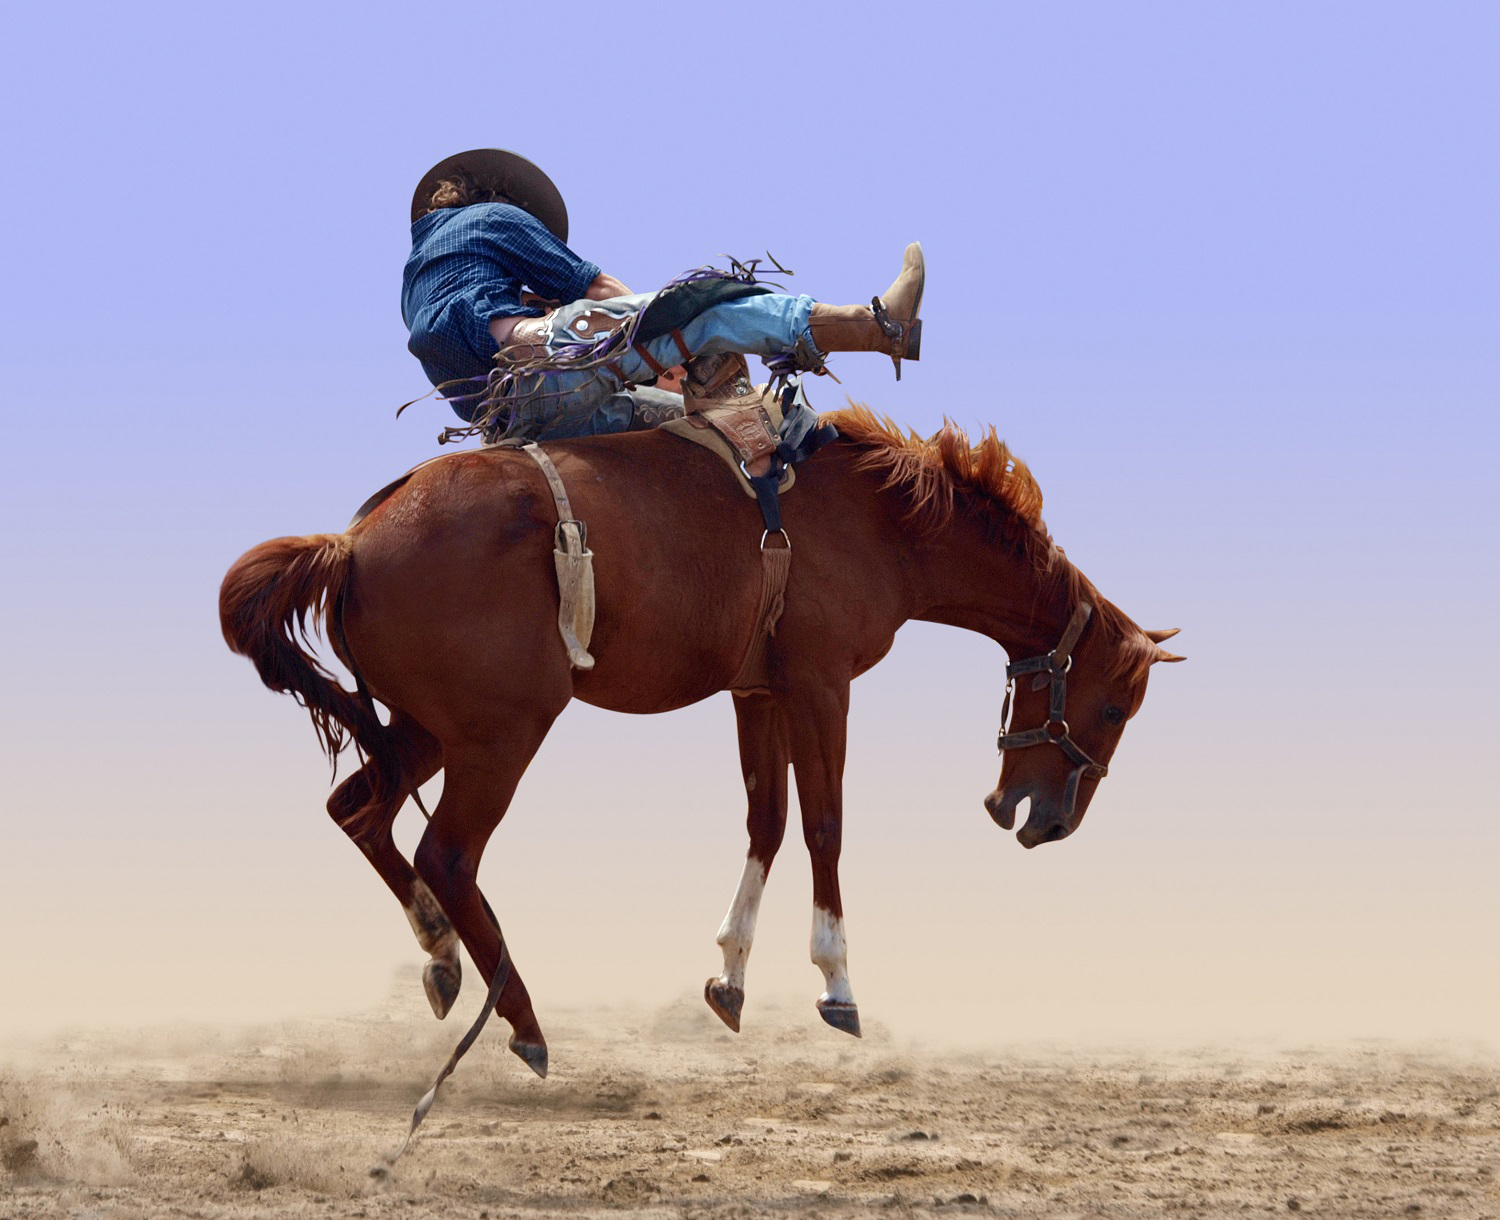

In [37]:
img=Image.open("./dataset/pytorch/data/p1ch2/horse.jpg")
img

In [39]:
#전처리
img_t=preprocess(img)
batch_t=torch.unsqueeze(img_t,0)

In [46]:
#모델 탑제
batch_out=netG(batch_t) #Generator 의출력

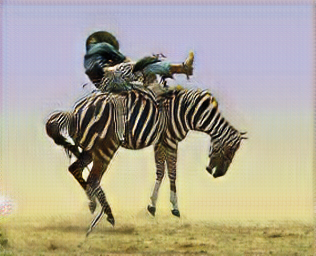

In [56]:
#print(batch_out) # 스케일링 되기전 확인 

out_t=(batch_out.data.squeeze()+1.0)/2.0 # tanh로 학습해 결과값이 -1~ 1 의값을 이미지 변환을위해 0~1사이로 바꿈
#print(out_t) #스케일링 된후 확인
out_img=transforms.ToPILImage()(out_t)  # (채널 수, 높이, 너비) 

out_img

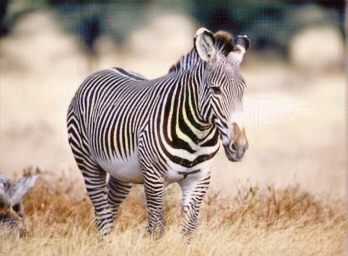

In [67]:
#그러면 이미지 다른놈을 해보면 어떻게될까?
img_g=preprocess(img_dog)
batch_dog=torch.unsqueeze(img_g,0) #배치추가
batch_out=netG(batch_dog)

out_dog= (batch_out.data.squeeze()+1.0)/2.0
out_img= transforms.ToPILImage()(out_dog)
out_img

#그러면 이미지 다른놈을 해보면 어떻게될까?
img_g=preprocess(img5)
batch_dog=torch.unsqueeze(img_g,0) #배치추가
batch_out=netG(batch_dog)

out_dog= (batch_out.data.squeeze()+1.0)/2.0
out_img= transforms.ToPILImage()(out_dog)
out_img


## 토치허브

- PyTorch에서 제공하는 기능 중 하나로, 연구자들이 깃허브에 공개한 미리 학습된 모델이나 연구 모델들을 쉽게 다운로드하고 로딩할 수 있는 인터페이스를 제공
- 

In [49]:
import torch
from torch import hub

In [51]:
resnet_18_model=hub.load("pytorch/vision:main",'resnet18',pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /Users/b32/.cache/torch/hub/main.zip
/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/b32/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████| 44.7M/44.7